# Alunos: 
# Weld Lucas Cunha, Rodrigo de Passos Barros, Leticia Paiva

## Esse trabalho tem como base o código fornecido em aula pelo professor Samuel.

## 1. Set up

#### Imports

In [1]:
from copy import deepcopy
from typing import Tuple

import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

#### Creating fake data

In [2]:
# fake data for testing
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.5, random_state=42)

print(X.shape)
print(y.shape)
print(f'Labels: {np.unique(y)}')

(1000, 2)
(1000,)
Labels: [0 1 2 3]


In [3]:
# splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_train.shape = (800, 2)
y_train.shape = (800,)
X_test.shape = (200, 2)
y_test.shape = (200,)


In [4]:
print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')

print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_train.shape = (800, 2)
y_train.shape = (800,)
X_test.shape = (200, 2)
y_test.shape = (200,)


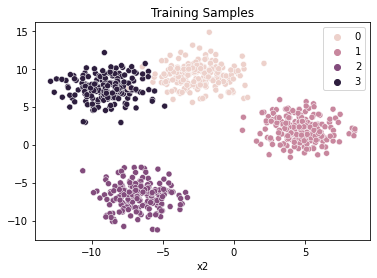

In [5]:
def plot_scatter(X_array, y_array, title=''):
    plt.title(title)
    sns.scatterplot(x=X_array[:, 0], y=X_array[:, 1], hue=y_array)
    plt.xlabel('x1')
    plt.xlabel('x2')    
    plt.show()

plot_scatter(X_train, y_train, title='Training Samples')

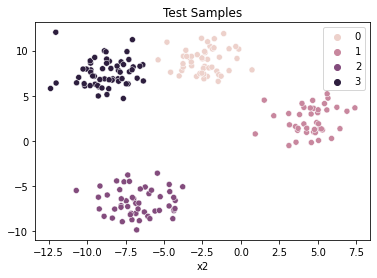

In [6]:
plot_scatter(X_test, y_test, title='Test Samples')

## 2. Implementation

In [7]:
from LogisticRegression import LogisticRegression

Foi implementada a estratégia one vs rest.
Nesta estratégia são treinados N classificadores binários, onde N é o número de classes presentes no dataset.

Essa abordagem requer que cada modelo preveja uma probabilidade de associação de classe ou uma pontuação 
semelhante à probabilidade. O argmax dessas pontuações (índice de classe com a maior pontuação) é então usado 
para prever uma classe.

In [8]:
clf = LogisticRegression()
clf

LogisticRegression()

In [9]:
print(clf)

Learning rate: 0.01
Number of epochs: 100
Regularization constant (alpha): 0.01
Optimizer: batch

Random state: 42

Trained?: False



#### **Testing `fit()`**

In [10]:
# L2 regularization - alpha=100
clf = LogisticRegression(alpha=100)
clf.fit(X_train, y_train)
clf.coef_

{0: array([0.00738216, 0.00882655]),
 1: array([ 0.02432263, -0.00675822]),
 2: array([-0.00231923, -0.02670216]),
 3: array([-0.00658947,  0.00432264])}

Aqui temos coef_ como um dicionario que contém diversos vetores/arrays.
Um para cada classe, onde esta classe é considerada a classe positiva (ou classe 1) e o resto a clase negativa (ou classe zero).

In [11]:
print(clf)

Learning rate: 0.01
Number of epochs: 100
Regularization constant (alpha): 100
Optimizer: batch

Random state: 42

Trained?: True



### Prediction

In [12]:
y_test_prob = clf.predict_proba(X_test)
y_test_prob

array([0.47382363, 0.46215321, 0.50430048, 0.47343428, 0.46761495,
       0.46609717, 0.50818333, 0.46139664, 0.50376652, 0.46333508,
       0.45793288, 0.4794313 , 0.46653411, 0.4648617 , 0.46721574,
       0.46018402, 0.46269988, 0.47517345, 0.4651565 , 0.46145595,
       0.46194578, 0.45723173, 0.45745919, 0.49463464, 0.48830933,
       0.48241919, 0.46668312, 0.46789422, 0.47168018, 0.45960598,
       0.46046883, 0.47573803, 0.4747297 , 0.46819089, 0.4846509 ,
       0.49866211, 0.48359899, 0.46483305, 0.45964051, 0.49247611,
       0.45714102, 0.46220511, 0.46704038, 0.49058645, 0.45935688,
       0.46443052, 0.46681931, 0.45826345, 0.45624095, 0.46693483,
       0.48007433, 0.45633359, 0.46135389, 0.47504628, 0.46824644,
       0.48582744, 0.46921195, 0.4820112 , 0.46694059, 0.50580604,
       0.4931712 , 0.45899736, 0.46195851, 0.49510095, 0.5056421 ,
       0.4609076 , 0.46957928, 0.46177275, 0.46180073, 0.45732348,
       0.45892834, 0.4638367 , 0.46650321, 0.46570991, 0.49488

In [13]:
y_test_pred = clf.predict(X_test)
y_test_pred

array([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0,
       1, 2, 2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2,
       0, 3, 1, 0, 0, 3, 1, 3, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0,
       0, 3, 3, 0, 0, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3,
       3, 2, 3, 3, 1, 3, 3, 3, 1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 3, 3, 2,
       1, 1, 0, 2, 2, 3, 0, 0, 1, 2, 2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2,
       3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 2, 2, 1, 3, 2,
       3, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0, 2, 2, 2, 0, 3, 1, 1, 1,
       1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 3, 1, 2, 2, 0, 3, 1, 3, 2, 0, 3, 1,
       2, 1])

In [14]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        49
           1       1.00      0.98      0.99        41
           2       1.00      1.00      1.00        53
           3       0.92      1.00      0.96        57

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



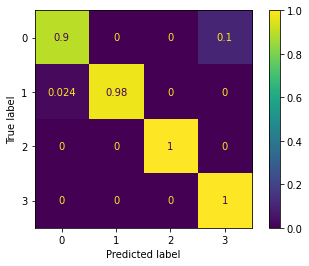

In [15]:
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

# Validating the implementation on Wine Dataset

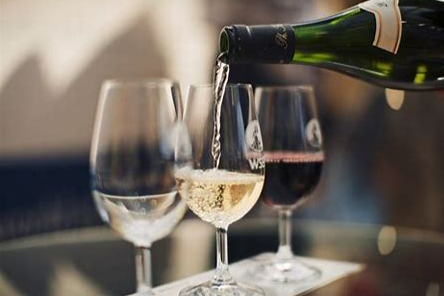

In [16]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [17]:
wine = load_wine()
X = wine['data']
y = wine['target']

In [18]:
print(X.shape)
print(y.shape)
print(f'Labels: {np.unique(y)}')

(178, 13)
(178,)
Labels: [0 1 2]


In [19]:
# splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_train.shape = (142, 13)
y_train.shape = (142,)
X_test.shape = (36, 13)
y_test.shape = (36,)


## Data Exploration

In [20]:
df = pd.DataFrame(X_train, columns=wine['feature_names'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
1,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
2,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
3,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
4,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
138,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
139,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
140,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,142.0,12.979085,0.820116,11.03,12.3325,13.010,13.6775,14.83
malic_acid,142.0,2.373521,1.143934,0.89,1.6150,1.875,3.1350,5.80
ash,142.0,2.360845,0.279217,1.36,2.2100,2.360,2.5400,3.23
alcalinity_of_ash,142.0,19.473239,3.454792,10.60,17.2000,19.200,21.5000,30.00
magnesium,142.0,100.443662,14.650793,70.00,88.2500,98.000,107.0000,162.00
total_phenols,142.0,2.289085,0.637715,0.98,1.7250,2.310,2.8000,3.88
flavanoids,142.0,2.002113,1.004170,0.34,1.1250,2.075,2.8425,5.08
nonflavanoid_phenols,142.0,0.368028,0.128269,0.13,0.2700,0.340,0.4700,0.66
proanthocyanins,142.0,1.608028,0.583656,0.42,1.2500,1.555,1.9675,3.58
color_intensity,142.0,5.057606,2.330917,1.74,3.2200,4.600,6.1225,13.00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
dtypes: fl

## Preprocessing

In [23]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Components Analysis

In [24]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_train)

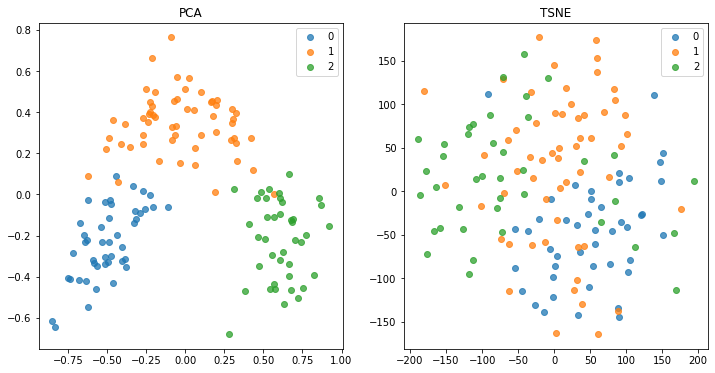

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('PCA')
for y in np.unique(y_train):
    X_tmp = X_pca[y_train == y]
    plt.scatter(X_tmp[:, 0], X_tmp[:, 1], label=y, alpha=0.75)
plt.legend()
plt.subplot(1,2,2)          
plt.title('TSNE')
for y in np.unique(y_train):
    X_tmp = X_tsne[y_train == y]
    plt.scatter(X_tmp[:, 0], X_tmp[:, 1], label=y, alpha=0.75)
plt.legend()

plt.show()

Pode ser observado que, ao aplicar o PCA, as três classes são distintas umas das outras, podendo ser separadas quase que perfeitamente. Já a técnica TSNE não apresenta a mesma capacidada quando considerando-se apenas as 2 componentes mais relevantes.


## Baseline

In [26]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

In [27]:
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.61      1.00      0.76        14
           2       0.00      0.00      0.00         8

    accuracy                           0.75        36
   macro avg       0.54      0.64      0.57        36
weighted avg       0.63      0.75      0.67        36



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


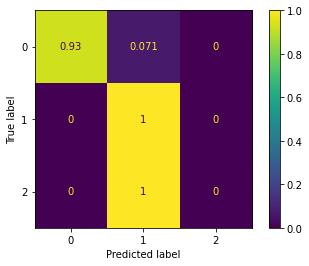

In [28]:
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

O modelo base apresentou uma performance bastante ruim.
Este modelo foi treinado considerando os valores padrão da classe LogisticRegression. Na próxima seção será realizado o fine-tuning, visando obter melhores resultados no teste.

## Stochastic

In [29]:
clf = LogisticRegression(optimizer="stochastic")
clf.fit(X_train, y_train)

In [30]:
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



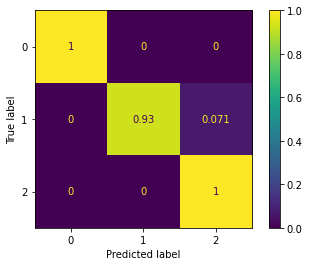

In [31]:
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

## Mini-batch

In [32]:
clf = LogisticRegression(optimizer="mini")
clf.fit(X_train, y_train)

In [34]:
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



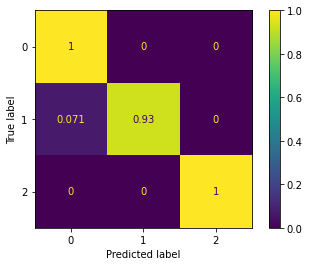

In [35]:
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

## Fine-Tuning

In [ ]:
n_jobs = 4
n_iter = 100
cv = 5
scoring = 'balanced_accuracy'

In [ ]:
# LogisticRegression:
param_grid = {'learning_rate': [10, 1, 1e-1, 1e-2, 1e-3],
              'n_epochs': [100, 200, 500, 1000],
              'alpha': [10, 1, 1e-1, 1e-2, 1e-3],
             }

logreg_clf = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid, n_iter=n_iter, cv=cv,
                             scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
logreg_clf.fit(X_train, y_train)

In [ ]:
model = logreg_clf.best_estimator_ 
model.fit(X_train, y_train)

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

In [ ]:
plot_confusion_matrix(model, X_test, y_test, normalize='true')

Após o fine-tuning pudemos notar que o modelo obteve uma melhoria significativa em relação ao baseline.
Este é um dataset relativamente simples e pequeno. Não era esperado um resultado perfeito na base de teste.

# Conclusion

Pudemos observar que a classe foi estendida para que pudesse lidar com problemas multiclasse, para isso foi escolhida a estratégia one vs all, devido a sua simplicidade e se adequar melhor para problemas de muitas classes, se comparado à estratégia one vs one.

Considerando o dataset de validação, wine dataset, tivemos um baseline bastante ruim, porém ao fazer o fine-tuning obtivemos um excelente resultado.

Não foram implementadas diferentes versões do gradiente descendente.